In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import datetime
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore")

In [2]:
front_path = 'base_cursos_alura_frontend.xlsx'
cursos_front = pd.read_excel(front_path).drop(columns={'Unnamed: 0'})
cursos_front.head()

,Assunto,Nome_Curso,Carga_Horaria,url,contagem_alunos,nota_curso
0,HTML e CSS,Curso HTML e CSS: praticando HTML/CSS,08h,https://www.alura.com.br/curso-online-html-css...,21893,9.3
1,HTML e CSS,Curso HTML e CSS: responsividade com mobile-first,12h,https://www.alura.com.br/curso-online-html-css...,12589,9.5
2,HTML e CSS,Curso HTML e CSS: ambientes de desenvolvimento...,08h,https://www.alura.com.br/curso-online-html-css...,31472,9.5
3,HTML e CSS,"Curso HTML e CSS: Classes, posicionamento e Fl...",08h,https://www.alura.com.br/curso-online-html-css...,22216,9.6
4,HTML e CSS,"Curso HTML e CSS: cabeçalho, footer e variávei...",06h,https://www.alura.com.br/curso-online-html-css...,18044,9.7


In [3]:
cursos_front['Nome_Curso'] = cursos_front['Nome_Curso'].str.replace('Curso','').str.strip()
cursos_front.rename(columns={'Nome_Curso':'nome_curso'},inplace=True)
cursos_front.head()

,Assunto,nome_curso,Carga_Horaria,url,contagem_alunos,nota_curso
0,HTML e CSS,HTML e CSS: praticando HTML/CSS,08h,https://www.alura.com.br/curso-online-html-css...,21893,9.3
1,HTML e CSS,HTML e CSS: responsividade com mobile-first,12h,https://www.alura.com.br/curso-online-html-css...,12589,9.5
2,HTML e CSS,"HTML e CSS: ambientes de desenvolvimento, estr...",08h,https://www.alura.com.br/curso-online-html-css...,31472,9.5
3,HTML e CSS,"HTML e CSS: Classes, posicionamento e Flexbox",08h,https://www.alura.com.br/curso-online-html-css...,22216,9.6
4,HTML e CSS,"HTML e CSS: cabeçalho, footer e variáveis CSS",06h,https://www.alura.com.br/curso-online-html-css...,18044,9.7


In [4]:
df = pd.read_csv('../atividades_geral.csv')
qtde_concluintes = df.groupby('nome_curso')['data_fim_curso'].count().reset_index()
qtde_concluintes.columns=['nome_curso','qtde_concluintes']
qtde_concluintes.head()

,nome_curso,qtde_concluintes
0,(I/O) com R: formatos diferentes de entrada e ...,83
1,.NET 5 e EF Core: relacionando entidades,692
2,.NET 5 e Identity: autenticando e autorizando ...,364
3,.NET 5 e Identity: implementando controle de u...,493
4,.NET 6 e Identity: implementando controle de u...,64


In [5]:
cursos_front_ = pd.merge(cursos_front,qtde_concluintes,how='left',left_on='nome_curso', right_on='nome_curso')
cursos_front_.head()

,Assunto,nome_curso,Carga_Horaria,url,contagem_alunos,nota_curso,qtde_concluintes
0,HTML e CSS,HTML e CSS: praticando HTML/CSS,08h,https://www.alura.com.br/curso-online-html-css...,21893,9.3,4077.0
1,HTML e CSS,HTML e CSS: responsividade com mobile-first,12h,https://www.alura.com.br/curso-online-html-css...,12589,9.5,2652.0
2,HTML e CSS,"HTML e CSS: ambientes de desenvolvimento, estr...",08h,https://www.alura.com.br/curso-online-html-css...,31472,9.5,4389.0
3,HTML e CSS,"HTML e CSS: Classes, posicionamento e Flexbox",08h,https://www.alura.com.br/curso-online-html-css...,22216,9.6,3400.0
4,HTML e CSS,"HTML e CSS: cabeçalho, footer e variáveis CSS",06h,https://www.alura.com.br/curso-online-html-css...,18044,9.7,2725.0


In [6]:
cursos_front_['taxa_conclusao'] = round((cursos_front_['qtde_concluintes']/cursos_front_['contagem_alunos'])*100,1)
cursos_front_['Carga_Horaria'] = cursos_front_['Carga_Horaria'].str.replace('h','').astype(int)

## Analisando os cursos

#### Análise por frequência absoluta

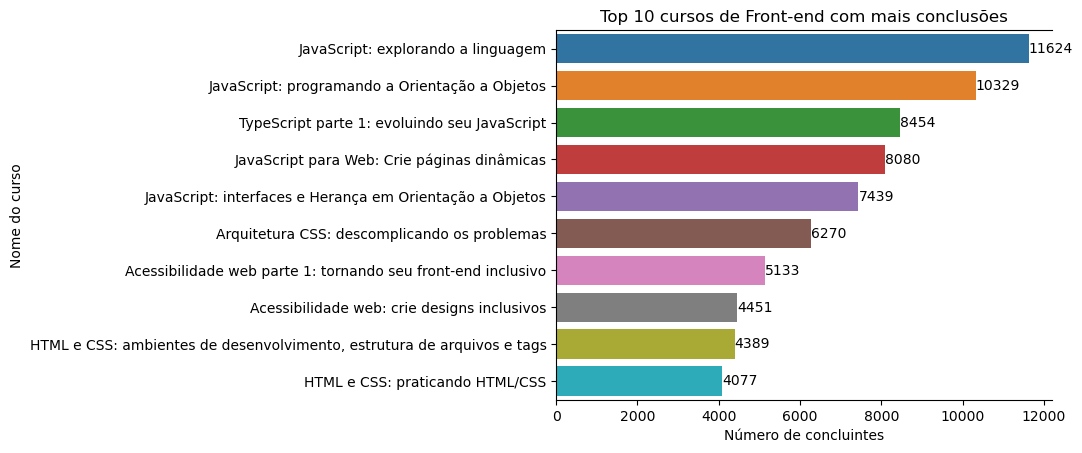

In [8]:
ax = sns.barplot(cursos_front_,
y='nome_curso',x='qtde_concluintes',
order=cursos_front_.sort_values('qtde_concluintes',ascending=False)['nome_curso'].values[:10])
ax.bar_label(ax.containers[0],fmt=lambda x: f'{x:.0f}')
ax.spines['right'].set_visible(False)
ax.set_title('Top 10 cursos de Front-end com mais conclusões')
plt.ylabel('Nome do curso')
plt.xlabel('Número de concluintes')
plt.show()

#### Análise percentual

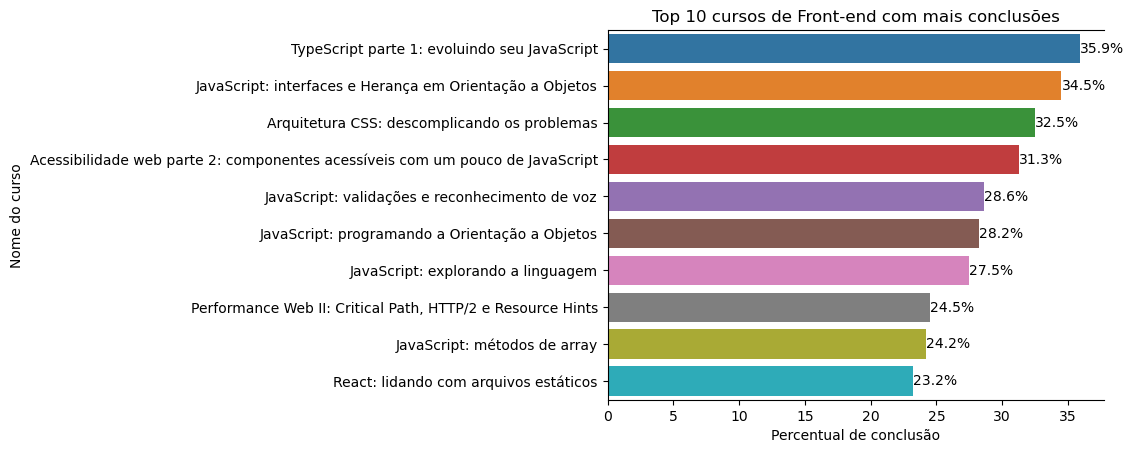

In [10]:
ax = sns.barplot(cursos_front_,
y='nome_curso',x='taxa_conclusao',
order=cursos_front_.sort_values('taxa_conclusao',ascending=False)['nome_curso'].values[:10])
ax.bar_label(ax.containers[0],fmt=lambda x: f'{x}%')
ax.spines['right'].set_visible(False)
ax.set_title('Top 10 cursos de Front-end com mais conclusões')
plt.ylabel('Nome do curso')
plt.xlabel('Percentual de conclusão')
plt.show()

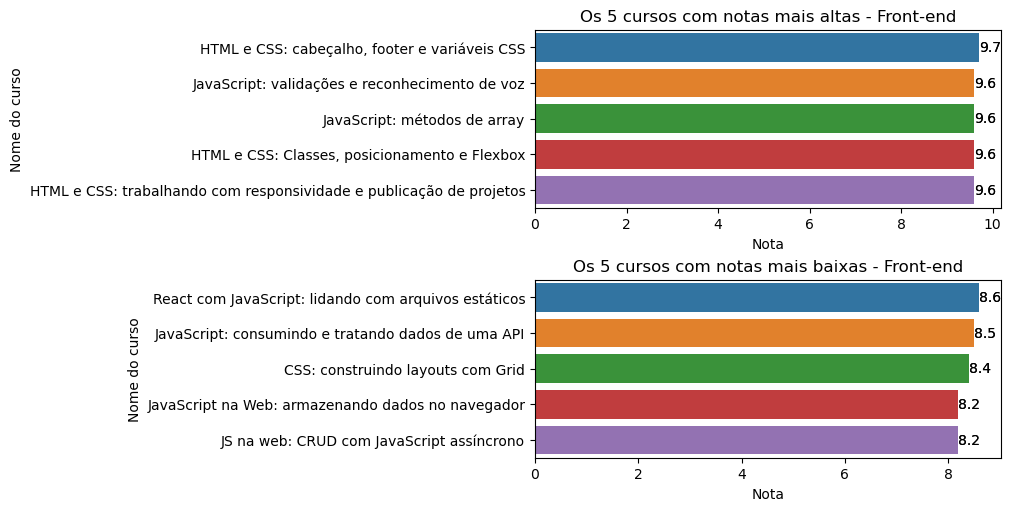

In [13]:
notas = cursos_front_.sort_values('nota_curso',ascending=False)
fig, axs = plt.subplots(2,1,constrained_layout=True,figsize=(10,5))

sns.barplot(notas.head(),
y='nome_curso',x='nota_curso',ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Os 5 cursos com notas mais altas - Front-end')
axs[0].bar_label(axs[0].containers[0])
axs[0].set_ylabel('Nome do curso')
axs[0].set_xlabel('Nota')


sns.barplot(notas.tail(),
y='nome_curso',x='nota_curso',ax=axs[1])
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('Os 5 cursos com notas mais baixas - Front-end')
axs[1].bar_label(axs[1].containers[0])
axs[1].set_ylabel('Nome do curso')
axs[1].set_xlabel('Nota')

fig.show()

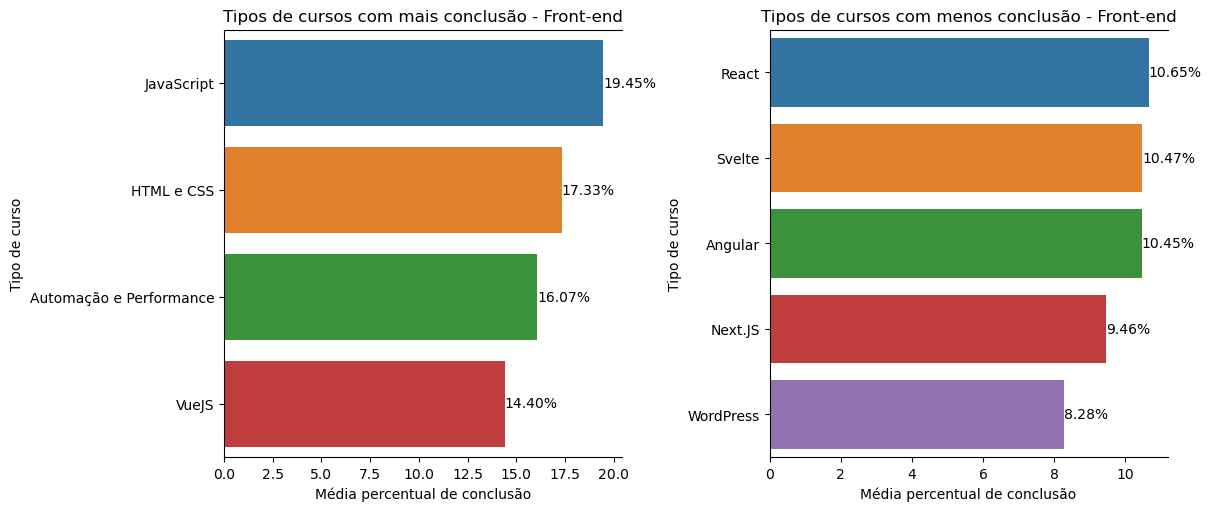

In [14]:
fig, axs = plt.subplots(1,2,constrained_layout=True,figsize=(12,5))

sns.barplot(cursos_front_.groupby('Assunto',as_index=False)['taxa_conclusao'].mean().sort_values('taxa_conclusao',ascending=False).head(4),
y='Assunto',x='taxa_conclusao',ax=axs[0])
axs[0].bar_label(axs[0].containers[0],fmt=lambda x: f'{x:.2f}%')
axs[0].set_title('Tipos de cursos com mais conclusão - Front-end')
axs[0].set_ylabel('Tipo de curso')
axs[0].set_xlabel('Média percentual de conclusão')


sns.barplot(cursos_front_.groupby('Assunto',as_index=False)['taxa_conclusao'].mean().sort_values('taxa_conclusao',ascending=False).tail(),
y='Assunto',x='taxa_conclusao',ax=axs[1])
axs[1].bar_label(axs[1].containers[0],fmt=lambda x: f'{x:.2f}%')

axs[0].spines['right'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].set_title('Tipos de cursos com menos conclusão - Front-end')
axs[1].set_ylabel('Tipo de curso')
axs[1].set_xlabel('Média percentual de conclusão')

plt.show()

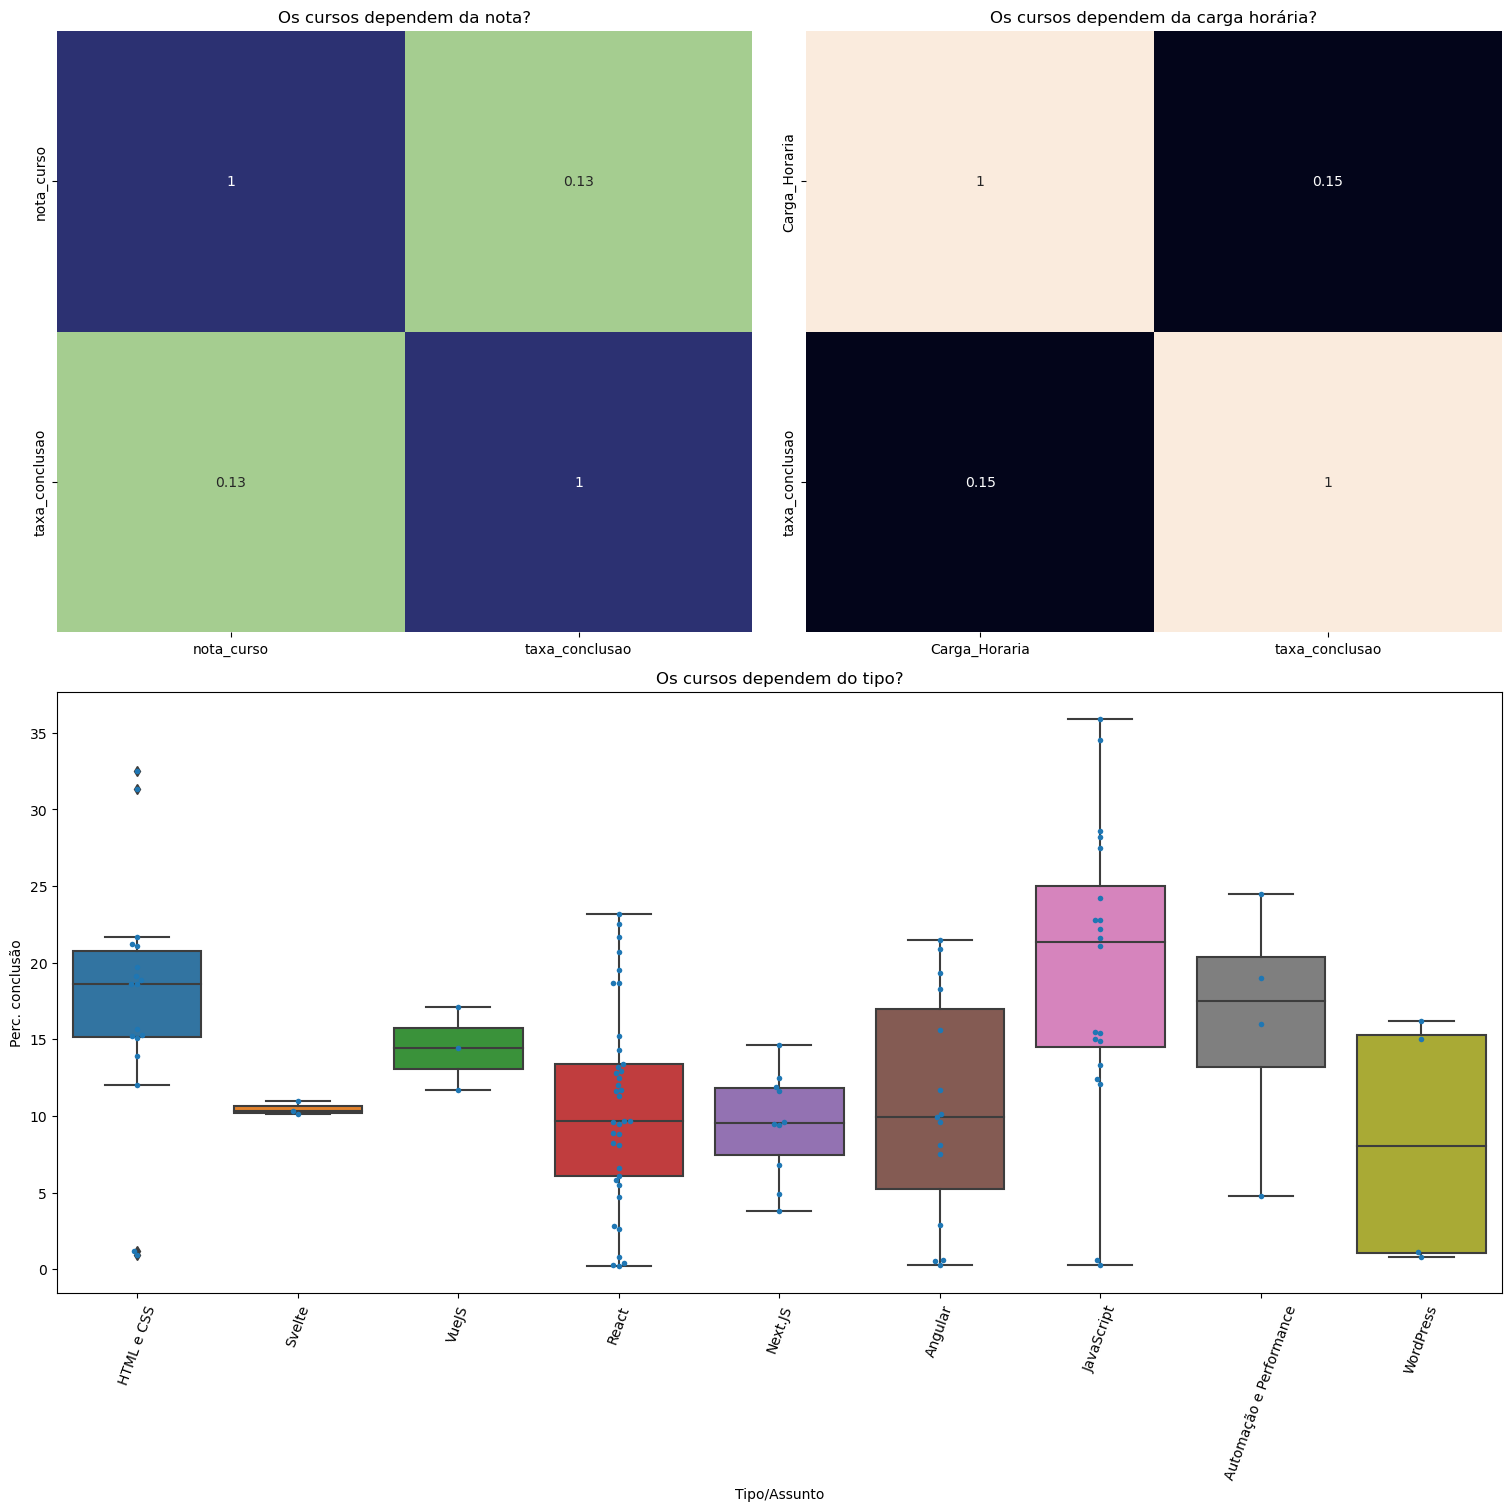

In [19]:
fig = plt.figure(constrained_layout=True, figsize=(15, 15))

gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])


sns.heatmap(cursos_front_[['nota_curso','taxa_conclusao']].corr(method='pearson'),annot=True,
cbar=False,ax=ax1, cmap="crest")
ax1.set_title('Os cursos dependem da nota?',size=12)


sns.heatmap(cursos_front_[['Carga_Horaria','taxa_conclusao']].corr(method='pearson'),annot=True,
cbar=False,ax=ax2)
ax2.set_title('Os cursos dependem da carga horária?',size=12)



sns.boxplot(cursos_front_[cursos_front_.taxa_conclusao<=100],x='Assunto',y='taxa_conclusao',ax=ax3)
#sns.violinplot(cursos_design_[cursos_design_.taxa_conclusao<=100],y='taxa_conclusao', x='Assunto',inner=None)
sns.swarmplot(cursos_front_, y="taxa_conclusao", x="Assunto", size=4,ax=ax3)
ax3.set_title('Os cursos dependem do tipo?',size=12)
ax3.set_xlabel('Tipo/Assunto')
ax3.set_ylabel('Perc. conclusão')
for tick in ax3.get_xticklabels():
    tick.set_rotation(70)


fig.show()

Insight ✍️

- Os cursos não dependem da nota, nem da carga horária
- Os cursos de HTML e CSS e JavaScript apresentam maiores percentuais de conclusão, enquanto cursos como NextJS, Angular e WordPress apresentam baixos percentuais